### Setup

In [1]:
import numpy as np
import time

In [2]:
from qiskit import *
from qiskit.pulse import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

In [3]:
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-ornl', group='bes-qis', project='argonne')>]

In [6]:
provider = IBMQ.get_provider(group='bes-qis')
backend = provider.get_backend('ibmq_boeblingen')
system = pulse.PulseChannelSpec.from_backend(backend)
cmd_def = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)

------
### Apply X on first qubit, then measure

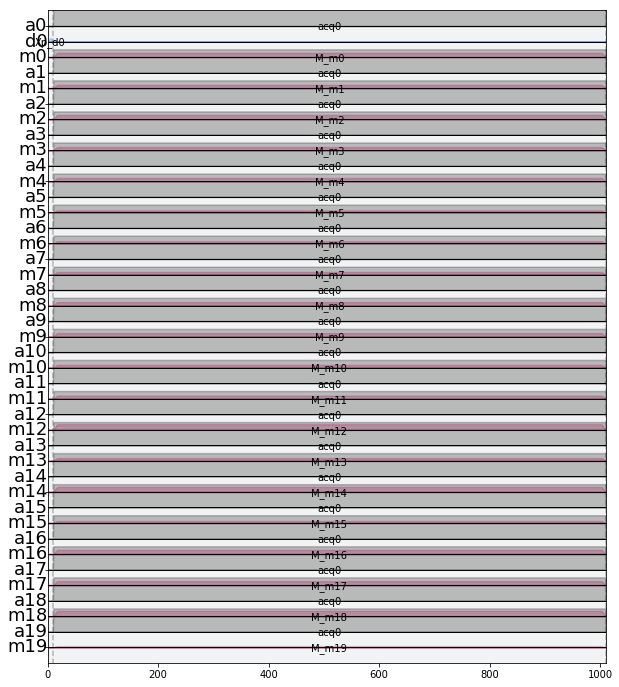

In [7]:
schedule = pulse.Schedule(name='Apply X on first qubit, then measure')
schedule |= cmd_def.get('x', qubits=[0])
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [8]:
job = execute(schedule, backend=backend)

In [9]:
print(job.job_id())

5d81220891f68a0019799786


In [36]:
job_id = '5d81220891f68a0019799786'
job = backend.retrieve_job(job_id)
job_monitor(job)

Job Status: job has successfully run


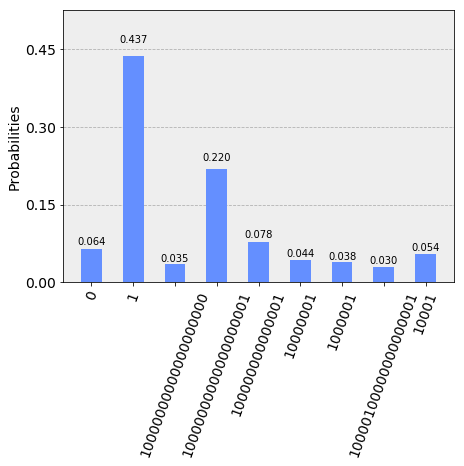

In [37]:
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items() if value > 15}
plot_histogram(counts)

------
### Same, but using gates / OpenQASM

In [23]:
qr = QuantumRegister(20)
cr = ClassicalRegister(20)
circ = QuantumCircuit(qr, cr)
circ.x(0)
circ.measure(qr, cr)
print(circ)

                                                                   ┌───┐┌─┐
 q1_0: |0>─────────────────────────────────────────────────────────┤ X ├┤M├
          ┌─┐                                                      └───┘└╥┘
 q1_1: |0>┤M├────────────────────────────────────────────────────────────╫─
          └╥┘┌─┐                                                         ║ 
 q1_2: |0>─╫─┤M├─────────────────────────────────────────────────────────╫─
           ║ └╥┘┌─┐                                                      ║ 
 q1_3: |0>─╫──╫─┤M├──────────────────────────────────────────────────────╫─
           ║  ║ └╥┘┌─┐                                                   ║ 
 q1_4: |0>─╫──╫──╫─┤M├───────────────────────────────────────────────────╫─
           ║  ║  ║ └╥┘┌─┐                                                ║ 
 q1_5: |0>─╫──╫──╫──╫─┤M├────────────────────────────────────────────────╫─
           ║  ║  ║  ║ └╥┘┌─┐                                             ║ 
 q1_6: |0>─╫

In [24]:
job = execute(circ, backend=backend)
print(job.job_id())

5d813a0147a76500199738e1


In [31]:
job_id = '5d813a0147a76500199738e1'
job = backend.retrieve_job(job_id)
job_monitor(job)

Job Status: job has successfully run


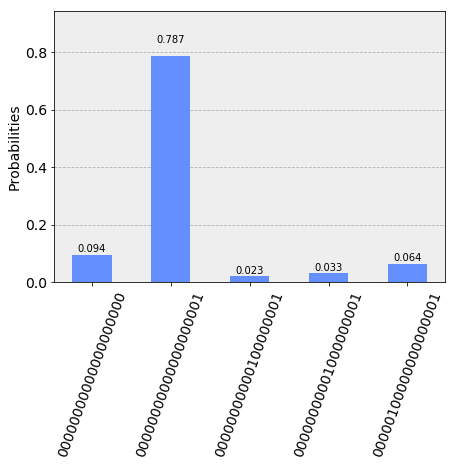

In [34]:
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items() if value > 15}
plot_histogram(counts)